# Global Optimization

## What you'll learn today
1.  Some properties of convex functions and their importance in optimization problems
2.  Examples of non-convex functions that have multiple local minima
3.  Why problems with multiple local minima are problematic for gradient descent and Newton's method.
4.  Algorithms for dealing with multiple local minima

## Roadmap
1. Convex functions and their utility for solving optimization problems
2.  Algorithmic approaches for solving problems with multiple local minima (or maxima). 
3.  Random restarts
4.  Differential Evolution
5.  Basin Hopping
6.  Particle Swarm

## Pre-Reading

https://en.wikipedia.org/wiki/Convex_function

https://en.wikipedia.org/wiki/Convex_set

https://en.wikipedia.org/wiki/Differential_evolution

https://en.wikipedia.org/wiki/Particle_swarm_optimization

http://pythonhosted.org/pyswarm/ - You'll need to install pyswarm.  Here's a link to documentation for it.  Install and run the examples in the documentation before you come to class.

http://www.cs.tufts.edu/comp/150GA/homeworks/hw3/_reading6%201995%20particle%20swarming.pdf - Original particle swarm paper.  

## Introduction - Problems where gradient-based methods have trouble
The methods discussed so far, work for problems that are called "convex".  Convex problems have the property that they have minimums (or maximums) and that the minimums are unique.  Wikipedia gives good coverage (and graphics) regarding convex functions.  https://en.wikipedia.org/wiki/Convex_function .  The wikipedia article on convex functions gives an alternative definition of a convex function that relies on the area above the function being a convex set.  The wikipedia page on convex sets gives a good graphic portrayal and the accompanying mathematical descriptions.  Here's that link: https://en.wikipedia.org/wiki/Convex_set.  

The code below shows the equation and draws the plot for the assymetric double claw (ADC).  Have a look at the plot.  ADC is a maximization problem.  

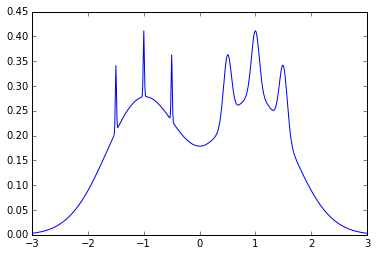

In [1]:
import math
import matplotlib.pyplot as plot
%matplotlib inline

def gausDens(x,mu, sigma):
    sigSq = sigma * sigma
    numerator = - (x - mu) * (x - mu)
    arg = numerator / (2 * sigSq)
    return math.exp(arg) / math.sqrt(2.0 * math.pi * sigSq)

def claw(xx):
    c1 = 0.46 * (gausDens(x, -1, 2.0 / 3.0) + gausDens(x, 1, 2.0 / 3.0))
    c2 = (1.0 / 300.0) * (gausDens(x, -0.5, 0.01) + gausDens(x, -1, 0.01) + gausDens(x, -1.5, 0.01))
    c3 = (7.0 / 300.0) * (gausDens(x, 0.5, 0.07) + gausDens(x, 1, 0.07) + gausDens(x, 1.5, 0.07))
    return c1 + c2 + c3

step = 1.0 / 100.0
num = 300

xArray = [x * step for x in range(-num, num, 1)]

yArray = [claw(x) for x in xArray]

plot.plot(xArray, yArray)
plot.show()

Schaffer's F6 is another well-known problem that causes trouble for ordinary optimization techniques.  Here are some graphs of that function: https://zhanggw.wordpress.com/2010/09/25/optimization-schaffer-f6-function-using-basic-genetic-algorithm-2/  

## Q's
1.  Comment on the differences between the maxima in ADC versus those in Shaffer's F6.
2.  How do convexity definitions change between a maximization problem and a minimization problem?
3.  Describe a numerical test you could run to show that ADC is not convex. 
4.  Suppose you're using gradient descent on this problem.  Trace out a credible series of steps and corresponding points on the graph.  What problems would arise?  

## Methods for dealing with non-unique local maxima (or minima).  

## Random Initialization
Gradient based methods start from an initial guess and hill climb (or roll down-hill) to a maximum (or minimum).  Like when you're hiking.  You climb the hill in front of you and when you get to the top, you see that there are other hills - some lower and some higher.  Random initialization is a way to start the hill climbing at a variety of different places in hopes that one of the starting points converges to the tallest hill.  Here's random initialization using BFGS to find the maximum of ADC.  



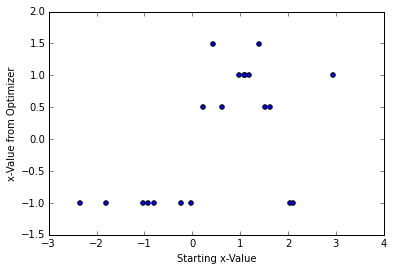

In [7]:
import math
import random
import numpy as np
from scipy import optimize
#import matplotlib.pyplot as plot
#%matplotlib inline

def gausDens(x,mu, sigma):
    sigSq = sigma * sigma
    numerator = - (x - mu) * (x - mu)
    arg = numerator / (2 * sigSq)
    return math.exp(arg) / math.sqrt(2.0 * math.pi * sigSq)

def deGaus(x, mu, sigma):
    sigSq = sigma * sigma
    numerator = - (x - mu)
    return gausDens(x, mu, sigma) * numerator / sigSq

def claw(xx):
    x = xx[0]
    c1 = 0.46 * (gausDens(x, -1.0, 2.0 / 3.0) + gausDens(x, 1.0, 2.0 / 3.0))
    c2 = (1.0 / 300.0) * (gausDens(x, -0.5, 0.01) + gausDens(x, -1.0, 0.01) + gausDens(x, -1.5, 0.01))
    c3 = (7.0 / 300.0) * (gausDens(x, 0.5, 0.07) + gausDens(x, 1.0, 0.07) + gausDens(x, 1.5, 0.07))
    return np.asarray(-(c1 + c2 + c3))

def dClaw(xx):
    x = xx[0]
    c1 = 0.46 * (deGaus(x, -1.0, 2.0 / 3.0) + deGaus(x, 1.0, 2.0 / 3.0))
    c2 = (1.0 / 300.0) * (deGaus(x, -0.5, 0.01) + deGaus(x, -1.0, 0.01) + deGaus(x, -1.5, 0.01))
    c3 = (7.0 / 300.0) * (deGaus(x, 0.5, 0.07) + deGaus(x, 1.0, 0.07) + deGaus(x, 1.5, 0.07))
    return np.asarray(-(c1 + c2 + c3))

#Set up searches from random points

nPts = 20
bestX = []
bestJ = []
answers = []
starts = []

for i in range(nPts):
    #generate random starting points in [-3,3]
    xStart = 6.0 * (random.random() - 0.5)
    star = optimize.fmin_l_bfgs_b(claw, xStart, fprime=dClaw)
    (x, j, dum)  = star
    result = (xStart, x[0], float(j))
    bestX.append(x[0])
    bestJ.append(float(j))
    answers.append(result)
    starts.append(xStart)

#print bestX
#print bestJ
#print xStart
#print answers
plot.scatter(starts, bestX)
plot.xlabel('Starting x-Value')
plot.ylabel('x-Value from Optimizer')
plot.show()

## Q's
1.  ADC is a maximization problem yet the code snip uses a minimizing version of bgfs.  How does that work?
2.  How many of the local mimima does this approach identify?  
3.  Discuss alternative approaches to random selection for finding starting points.  Would uniformly spread points make more sense?  How might you preclude choosing starting points that result in maxima that have already been found?  

## A's
1. Return the J and gardJ with a negative
2. Four
3. Problem and dimension dependent

Page 4 of the following paper has a number of challenging functions.  Here
http://www.computer-science.birmingham.ac.uk/~xin/papers/published_tec_jul99.pdf

Try your hand at their Function 8.  That function has numerous minima.  The two dimensional version of the function is plotted in Figure 4 in the referenced paper.  Here's the definition of the function

$F8 = \sum_{i=1}^{N} - x_i sin(\sqrt{|{x_i}|})$

The variable "N" can be chosen determine the dimensionality of the problem and to give the problem more or less minima.  According to the paper, the number of minima grows exponentially with N.  The $i^{th}$ element of the gradient vector is given by

$\frac{dF8}{dx_i} = -sin(\sqrt{|{x_i}|}) -\frac{x_i cos(\sqrt{|{x_i}|})sgn(x_i)}{2\sqrt{|{x_i}|}}$

In this equation the function sgn() is called the signum function (or sign function).  It stands as the derivative of the absolute value and is defined as

$sgn(x) = -1\quad if\quad x<0,\quad +1\quad if\quad x>0,\quad and\quad 0\quad if\quad x=0$

Strictly speaking the derivative of the absolute value function is not defined at 0.  Since there's only one point where it's not defined, it generally doesn't matter too much what value is assigned for the derivative at zero.  For most applications the value at zero could be anything between -1 and 1.  Zero makes the derivative symmetric.  

With a little rearranging the expression for the derivative becomes
$\frac{dF8}{dx_i} = -sin(\sqrt{|{x_i}|}) -\frac{\sqrt{|{x_i}|} cos(\sqrt{|{x_i}|})}{2}$

## Exercise:
The code below implements the functions f8 and df8 (the function and its gradient).  The code has a couple of parameters.  One is "nPts" which determines the number of random points that will be generated to start the optimizations.  The other is "N" which determines the order of the problem.  N is set to 4 in the code below which means that the problem is 4th order.  Fill in the code that goes in the commented section at the bottom of the code window. 

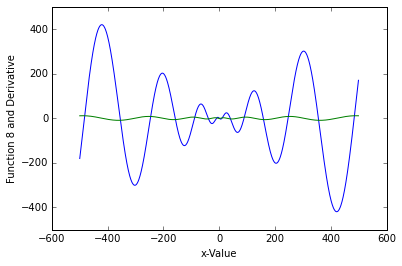

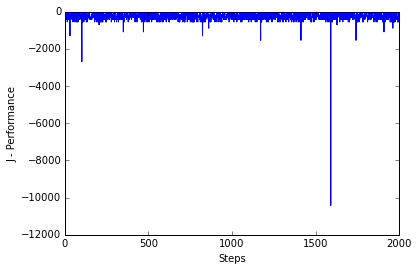

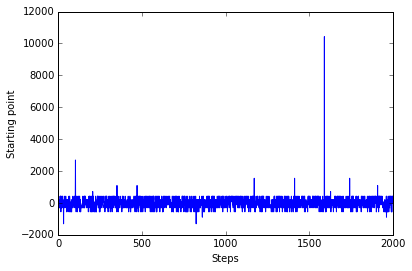

lowest_cost  -10426.7693291
time elapsed 0.894634008408


In [22]:
import math
import random
import numpy as np
from time import time
from scipy import optimize
import matplotlib.pyplot as plot
%matplotlib inline

def sgn(xx):
    if xx > 0.0: return xx
    if xx < 0.0: return -xx
    return 0.0

def sinSA(xx):
    return math.sin(math.sqrt(math.fabs(xx)))

def cosSA(xx):
    return math.cos(math.sqrt(math.fabs(xx)))

def f8(xx):
    return sum([-x*sinSA(x) for x in xx])

def df8(xx):
    return np.asarray([-sinSA(x) - math.sqrt(math.fabs(x)) * cosSA(x) * 0.5 for x in xx])


start = time()
#Check for reasonableness with one-dimensional version
xRange = range(-500, 500)
f8Vals = [f8(np.asarray([x])) for x in xRange]
fpVals = [df8(np.asarray([x])) for x in xRange]
fp = [x[0] for x in fpVals]

plot.plot(xRange, f8Vals)
plot.plot(xRange, fp)
plot.xlabel('x-Value')
plot.ylabel('Function 8 and Derivative')
plot.show()


#Set up searches from random points

nPts = 2000
N = 4
bestX = []
bestJ = []
answers = []
starts = []


for i in xrange(nPts):
    #add your code here to generate random starting 
    #points in [-500,500] and then fill in the arguments to
    xStart = 1000.0 * (random.random() - 0.5)

    star = optimize.fmin_l_bfgs_b( f8 , xStart, fprime=df8)
    (x, j, dum)  = star
    result = (xStart, x[0], float(j))
    bestX.append(x[0])
    bestJ.append(float(j))
    answers.append(result)
    starts.append(xStart)
    
    
plot.plot(xrange(len(bestJ)), bestJ)
plot.xlabel('Steps')
plot.ylabel('J - Performance')
plot.show()    

plot.plot(xrange(len(bestX)), bestX)
plot.xlabel('Steps')
plot.ylabel('Starting point')
plot.show()


    
end = time()
print "lowest_cost  {}".format(min(bestJ))
print "time elapsed {}".format(end - start)

## Differential Evolution
Differential evolution operates by establishing a "population" of candidate solutions and then randomly recombining population members to construct new candidates and replacing old candidates with new ones when the new candidates give better solutions than the old ones.  The wikipedia entry on differential evolution gives a good summary of how the algorithm works.  https://en.wikipedia.org/wiki/Differential_evolution

The code below illustrates the application of the differential evolution package from scipy.optimize to the ASD (assymetric double claw).  


In [42]:
import math
from scipy import optimize

def gausDens(x,mu, sigma):
    sigSq = sigma * sigma
    numerator = - (x - mu) * (x - mu)
    arg = numerator / (2 * sigSq)
    return math.exp(arg) / math.sqrt(2.0 * math.pi * sigSq)

def claw(xx):
    x = xx[0]
    c1 = 0.46 * (gausDens(x, -1.0, 2.0 / 3.0) + gausDens(x, 1.0, 2.0 / 3.0))
    c2 = (1.0 / 300.0) * (gausDens(x, -0.5, 0.01) + gausDens(x, -1.0, 0.01) + gausDens(x, -1.5, 0.01))
    c3 = (7.0 / 300.0) * (gausDens(x, 0.5, 0.07) + gausDens(x, 1.0, 0.07) + gausDens(x, 1.5, 0.07))
    return (-(c1 + c2 + c3))

# def dClaw(xx):  DE does not require gradient calculation

result = optimize.differential_evolution(claw,
            bounds=[(-3, 3)],
            strategy='best1bin',
            maxiter=None,
            popsize=15,
            tol=0.01,
            mutation= (0.5, 1.0),
            recombination=0.7)

print result.x, result.fun

[ 0.99950326] -0.411312326751


The parameters that available to tune performance are set to their default values in the code above.  Try changing the parameters to see how it alters the performance.  To get some ideas about how to alter the parameters you might look at the following link:  http://cci.lbl.gov/cctbx_sources/scitbx/differential_evolution.py The material on that link comes from the authors of the algorithm and has some helpful tips.  

## Exercise. 
Use the scipy.optimize differential evolution package to find the global minimum for the 4 parameter version of the f8 function.  When you have that running successfully change N to 30 and see if your results match the results given in http://www.computer-science.birmingham.ac.uk/~xin/papers/published_tec_jul99.pdf for the best function value.  

In [1]:
import math
from scipy import optimize

# the x's are the weight parameters 

def sgn(xx):
    if xx > 0.0: return xx
    if xx < 0.0: return -xx
    return 0.0

def sinSA(xx):
    return math.sin(math.sqrt(math.fabs(xx)))

def cosSA(xx):
    return math.cos(math.sqrt(math.fabs(xx)))

def f8(xx):
    return sum([-x*sinSA(x) for x in xx])

def df8(xx):
    return np.asarray([-sinSA(x) - math.sqrt(math.fabs(x)) * cosSA(x) * 0.5 for x in xx])

result = optimize.differential_evolution(f8,
            bounds=[(-500, 500)],
            strategy='best1bin',
            maxiter=None,
            popsize=15,
            tol=0.01,
            mutation= (0.5, 1.0),
            recombination=0.7)

print result.x[0], result.fun

420.968752789 -418.982887272


In [37]:
 print f8(result.x)

-418.982887272


## Basin Hopping
Earlier in this session you saw that different starting points for the assymetric double claw resulted in BFGS being drawn towards different maxima.  To see a graphical depiction of this google "basin hopping images".  What you'll see there is depictions of functions with multiple local minima and a step-wise constant function inscribed along the various local minima.  The idea with basin hopping is to find a local minmum and then to perturb the solution enough to cause it to in the domain of attraction for an adjacent minimum.  If the adjacent minimum is lower then it's accepted as the new best value.  If the adjacent minimum is too much higher then it's rejected.  If the adjacent minimum isn't too much higher then it can still serve as stepping stone for finding new adjacent minima.  The search for the global minimum hops from one basin to the next.  Here's how this looks in code.  

In [210]:
import math
import numpy as np
from scipy import optimize


def gausDens(x,mu, sigma):
    sigSq = sigma * sigma
    numerator = - (x - mu) * (x - mu)
    arg = numerator / (2 * sigSq)
    return math.exp(arg) / math.sqrt(2.0 * math.pi * sigSq)

def deGaus(x, mu, sigma):
    sigSq = sigma * sigma
    numerator = - (x - mu)
    return gausDens(x, mu, sigma) * numerator / sigSq

def clawWD(xx):
    x = xx[0]
    #calculate function value
    c1 = 0.46 * (gausDens(x, -1.0, 2.0 / 3.0) + gausDens(x, 1.0, 2.0 / 3.0))
    c2 = (1.0 / 300.0) * (gausDens(x, -0.5, 0.01) + gausDens(x, -1.0, 0.01) + gausDens(x, -1.5, 0.01))
    c3 = (7.0 / 300.0) * (gausDens(x, 0.5, 0.07) + gausDens(x, 1.0, 0.07) + gausDens(x, 1.5, 0.07))
    cl = -(c1 + c2 + c3)
    #calculate gradient (derivative) of function
    dc1 = 0.46 * (deGaus(x, -1.0, 2.0 / 3.0) + deGaus(x, 1.0, 2.0 / 3.0))
    dc2 = (1.0 / 300.0) * (deGaus(x, -0.5, 0.01) + deGaus(x, -1.0, 0.01) + deGaus(x, -1.5, 0.01))
    dc3 = (7.0 / 300.0) * (deGaus(x, 0.5, 0.07) + deGaus(x, 1.0, 0.07) + deGaus(x, 1.5, 0.07))
    dcl = np.asarray(-(dc1 + dc2 + dc3))
    return cl, dcl

def print_fun(x, f, accepted):
    print x, f, int(accepted)

minimizer_kwargs = {"method":"L-BFGS-B", "jac":True}
x0 = [1.0]

result = optimize.basinhopping(clawWD, x0,
        minimizer_kwargs=minimizer_kwargs,
        niter=200, callback=None,
        stepsize=0.01)
#to get a detailed look at the basin hopping search progress
#change callback=None to callback=print_fun

print result.x, result.fun

[ 0.99950326] -0.411312326751


Try changing niter and stepsize to see what effect it has on the solution.  You know from looking at the graph of the ADC function that the local minima are spaced 0.5 apart.  See how that works as a stepsize and how things change when you choose values larger and smaller.  It's also possible to supply your own stepsize function for managing the stepsizes more carefully.  

## Particle Swarm

Particle swarm optimization was developed by scientists who were building simple models to simulate behavior of groups of animals - for example flocking and swarming of birds.  The researchers found that their models tended to naturally optimize some criterion (like where is the most food) and abstracted the search technique to other problems.  Refer to the Kennedy paper to see the nature of these models.  

The basic idea is that a "population" is initialized by picking points at random from a defined search space.  The positions of the points are iteratively modified using a few simple hueristics.  The velocities of each point is matched to it's nearest neighbor.  The velocity of each agent is modified to drive that agent toward the best location it has seen and the velocity of each agent is modified to drive each agent towards the best location any of the population have seen. This yields a combination of searching randomly around each agent's best point and gradually the swarm converging towards the best values found by the population.  The code below illustrates the use of particle swarm optimization on the asymmetric double claw.  


In [120]:
import math
from pyswarm import pso



def gausDens(x,mu, sigma):
    sigSq = sigma * sigma
    numerator = - (x - mu) * (x - mu)
    arg = numerator / (2 * sigSq)
    return math.exp(arg) / math.sqrt(2.0 * math.pi * sigSq)

def claw(xx):
    c1 = 0.46 * (gausDens(xx, -1.0, 2.0 / 3.0) + gausDens(xx, 1.0, 2.0 / 3.0))
    c2 = (1.0 / 300.0) * (gausDens(xx, -0.5, 0.01) + gausDens(xx, -1.0, 0.01) + gausDens(xx, -1.5, 0.01))
    c3 = (7.0 / 300.0) * (gausDens(xx, 0.5, 0.07) + gausDens(xx, 1.0, 0.07) + gausDens(xx, 1.5, 0.07))
    return -(c1 + c2 + c3)

lb = [-3.0]
ub = [3.0]

# we are optimizing for a maximum 
xopt, adcOpt = pso(claw, lb, ub,maxiter= 10,phip=0.5, phig=0.5,)

print xopt 
print adcOpt 
print claw(-1.0), claw(1.0)

Stopping search: maximum iterations reached --> 10
[ 0.99943422]
-0.411312260721
-0.411308909015 -0.411308909017


Use basin hopping to find the global minimum in the F8 function.  Try it first with N=4 and compare with your in-class results with differential evolution.  Then try N=30 and compare your answer to the answer from the paper.  

### Basin Hopping with N = 4 & N = 30

In [1]:
import math
import numpy as np
from scipy import optimize


def sgn(xx):
    if xx > 0.0: return xx
    if xx < 0.0: return -xx
    return 0.0

def sinSA(xx):
    return math.sin(math.sqrt(math.fabs(xx)))

def cosSA(xx):
    return math.cos(math.sqrt(math.fabs(xx)))

def f8(xx):
    return sum([-x*sinSA(x) for x in xx])

def df8(xx):
    return np.asarray([-sinSA(x) - math.sqrt(math.fabs(x)) * cosSA(x) * 0.5 for x in xx])

def print_fun(x, f, accepted):
    print x, f, int(accepted)
    
def f8D(xx):
    df = np.asarray([-sinSA(x) - math.sqrt(math.fabs(x)) * cosSA(x) * 0.5 for x in xx])
    f = sum([-x*sinSA(x) for x in xx])
    return f, df

minimizer_kwargs = {"method":"L-BFGS-B"} #, "jac":True}
x0 = [1.0]

N = [4,30]
for n in N:
    result = optimize.basinhopping(f8, x0,
            minimizer_kwargs=minimizer_kwargs,
            niter=n, callback=None,
            stepsize=24.0)

    print "N = {0}, Min = {1:.5}, Cost = {2:.5}".format(n, result.x[0], result.fun)


N = 4, Min = -559.15, Cost = -557.16
N = 30, Min = -25.877, Cost = -24.083


In [5]:
 result.x

array([-25.87741717])

In [3]:
# cost
result.fun

-24.082960223068319

In [5]:
# weight(s)
result.x

array([-25.87741706])

2  Use particle swarm optimization for the f8 function with N=30.  Compare results with basin hopping.  What factors factors would influence your choice between these two algorithms?

### Particle Swarm with N = 4

In [5]:
import math
from pyswarm import pso


def sgn(xx):
    if xx > 0.0: return xx
    if xx < 0.0: return -xx
    return 0.0

def sinSA(xx):
    return math.sin(math.sqrt(math.fabs(xx)))

def cosSA(xx):
    return math.cos(math.sqrt(math.fabs(xx)))

def f8(xx):
    return sum([-x*sinSA(x) for x in xx])

def df8(xx):
    return f8, np.asarray([-sinSA(x) - math.sqrt(math.fabs(x)) * cosSA(x) * 0.5 for x in xx])[0]

def print_fun(x, f, accepted):
    print x, f, int(accepted)

N = 4
lb = [-500.0] * N
ub = [500.0]  * N

# we are optimizing for a maximum 
xopt, adcOpt = pso(f8, lb, ub,maxiter= 30,phip=0.5, phig=0.5)

print xopt # value of optimum weight
print adcOpt  # value of cost function 

Stopping search: maximum iterations reached --> 30
[-302.53405631  420.96367653  420.97576311  420.95161596]
-1557.49315746


### F8 and dF8 Plot

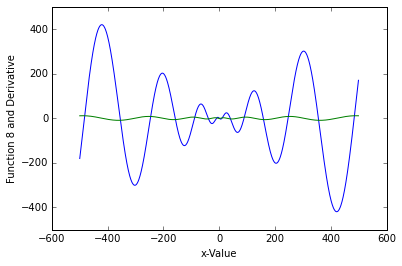

In [193]:
xRange = xrange(-500, 500)
f8Vals = [f8(np.asarray([x])) for x in xRange]
fpVals = [df8(np.asarray([x])) for x in xRange]
fp = [x[0] for x in fpVals]

plot.plot(xRange, f8Vals)
plot.plot(xRange, fp)
plot.xlabel('x-Value')
plot.ylabel('Function 8 and Derivative')
plot.show()